In [1]:
#Questions to answer:
#1.) What was the change in price of the stock over time? 
#2.) What was the daily return of the stock on average? 
#3.) What was the moving average of the various stocks?
#4.) What was the correlation between different stocks' closing prices?
#4.) What was the correlation between different stocks' daily returns?
#5.) How much value do we put at risk by investing in a particular stock? (risk analysis for stocks)
#6.) How can we attempt to predict future stock behavior?

In [38]:
#Data Libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#Viz Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #Gives white grid background
%matplotlib inline

#Reading Stock data from Google or Yahoo
import pandas_datareader.data as web

#For Time stamps
from datetime import datetime

#Remove float numbers
from __future__ import division


In [39]:
#Use Pandas to grab data from Yahoo

# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN','ACN']

In [40]:

# Set up End and Start times for data grab
end = datetime.now()

#End date is exactly a year from now (subtract 1 from year)
start = datetime(end.year-1,end.month,end.day)

In [42]:
#Create for loop to grab finance data and put in data frame

for stock in tech_list:
   # Set DataFrame as the Stock Ticker 
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)
    
# inputs are stock, website, & duration
# .globals() takes the stock ticker and makes it a global variable
# globals() is a sloppy way of setting the DataFrame names, but its simple

In [45]:
#.globals() allows me to call a stock and create a data frame using that name

ACN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-26,164.830002,162.919998,163.820007,164.740005,1782800.0,161.820007
2018-02-27,165.580002,162.550003,164.800003,162.550003,1820800.0,159.668808
2018-02-28,164.389999,160.949997,162.899994,161.009995,2002200.0,158.156097
2018-03-01,161.589996,155.880005,161.279999,156.149994,3005400.0,153.382248
2018-03-02,157.630005,154.690002,155.210007,157.500000,2960100.0,154.708328


In [46]:
# Summary Stats

ACN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,159.920470,157.371076,158.656096,158.644622,2.235902e+06,157.530994
std,7.622768,8.109333,7.841741,7.846448,1.002591e+06,7.633870
min,136.919998,132.630005,134.800003,133.669998,2.087500e+05,133.669998
25%,155.014999,152.254997,154.199997,153.810005,1.711100e+06,152.791527
50%,160.300003,157.839996,159.169998,159.229996,1.998600e+06,158.263504
75%,165.059998,162.385002,163.584999,163.534996,2.427000e+06,162.465004
max,175.639999,173.869995,174.750000,174.190002,8.561500e+06,172.612350


In [47]:
# Adj Closing price takes into account any stock changes (i.e. split stock)
# It adjusts the closing price accordingly
# Use this adjusted cloing price for analysis

In [48]:
# General info on data frame

ACN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-02-26 to 2019-02-25
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


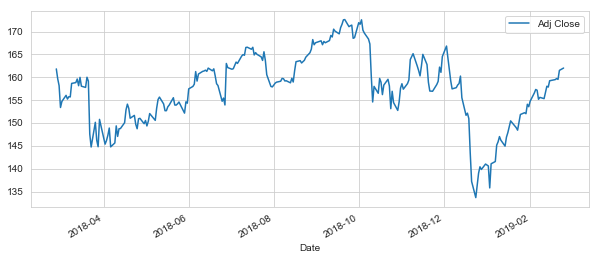

In [50]:
# Call Adj Close column and plot

ACN['Adj Close'].plot(legend=True,figsize=(10,4))

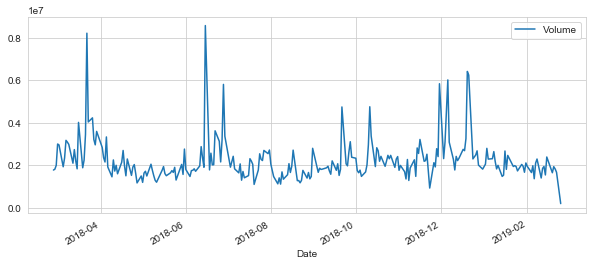

In [52]:
# Call volumn and plot

ACN['Volume'].plot(legend=True,figsize=(10,4))

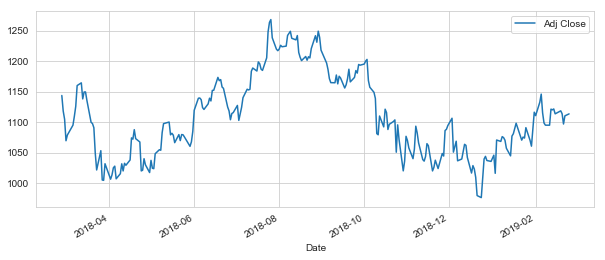

In [57]:
GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

In [54]:
# Moving Average

# For more info on the moving average check out the following links:

# 1.) http://www.investopedia.com/terms/m/movingaverage.asp

# 2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [75]:
# pandas has a built-in rolling mean calculator

# Let's plot out several moving averages (10 day, 20 day, 50 day)

ma_day = [10,20,50]

# for loop to create a column name (string) 10,20,50
# and then create a new column in ACN dataframe based on column name
# Call pandas rolling mean and take two inputs (adj closing and ma)

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    ACN[column_name] = pd.Series.rolling(AAPL['Adj Close'],ma).mean()

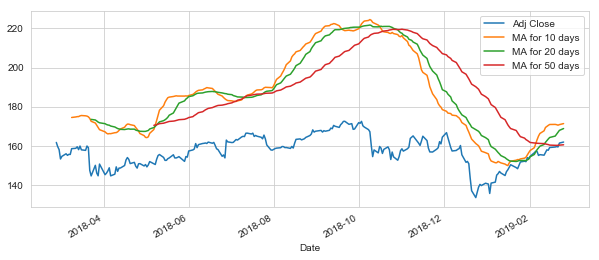

In [77]:
#Pass a list of column names into data frame and plot

ACN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [78]:
# Blue is the Adjusted closing cost
#The greater amount of days, the smoother the line
# This will help me to predict and understand behavior of stock

#http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

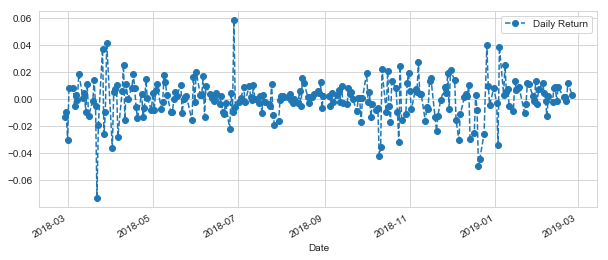

In [79]:
# Daily Returns and Risk of Stock

# Use Pandas to retrieve daily returns for ACN Stock

#Making a new column called 'daily return' which is the % change of adj close
ACN['Daily Return'] = ACN['Adj Close'].pct_change()

ACN['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

In [80]:
# Daily Returns tells me the % return on my money on any day
# If i buy stock at the beginning of the day, what is my % return at the end of the day
# Daily Return for the last year

C:\Users\ronald.a.daley\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


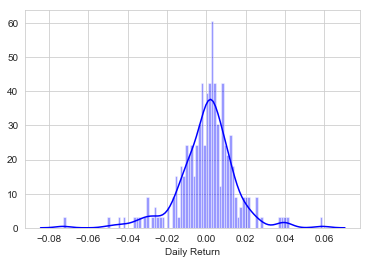

In [82]:
# Average Daily Return via Histogram (Seaborn module)

# Distplot allows me to place to plots on top of each other 
# Histogram and KDE
sns.distplot(ACN['Daily Return'].dropna(),bins=100,color='blue')

In [83]:
# Histogram of daily returns for the past year
# Skewed to be just slightly positive

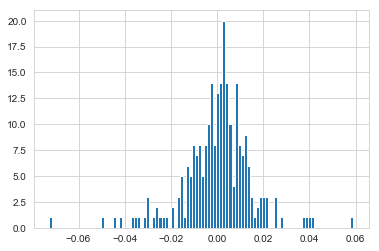

In [84]:
#Method 2 - Only histogram (Pandas)

ACN['Daily Return'].hist(bins=100)

In [85]:
ACN['Daily Return'].mean()

0.00011173912766432225

In [86]:
# Grab all the closing prices for the tech stock list into one DataFrame

# Create a new dataframe and used data reader to read stocks 
# pass tech list and specified i only want the 'Adj Close'
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [88]:
#View Daily closing price 

closing_df.head()

Symbols,AAPL,ACN,AMZN,GOOG,MSFT
Date,,,,,
2018-02-26,176.285675,161.820007,1521.949951,1143.750000,93.836113
2018-02-27,175.714386,159.668808,1511.979980,1118.290039,92.636375
2018-02-28,175.448410,158.156097,1512.449951,1104.729980,92.213516
2018-03-01,172.375214,153.382248,1493.449951,1069.520020,91.308777
2018-03-02,173.567078,154.708328,1500.250000,1078.920044,91.505470


In [89]:
# Get daily return for all the stocks

# Create new dataframe

tech_rets = closing_df.pct_change()

In [90]:
tech_rets.head()

Symbols,AAPL,ACN,AMZN,GOOG,MSFT
Date,,,,,
2018-02-26,NaN,NaN,NaN,NaN,NaN
2018-02-27,-0.003241,-0.013294,-0.006551,-0.022260,-0.012785
2018-02-28,-0.001514,-0.009474,0.000311,-0.012126,-0.004565
2018-03-01,-0.017516,-0.030184,-0.012562,-0.031872,-0.009811
2018-03-02,0.006914,0.008646,0.004553,0.008789,0.002154


In [91]:
tech_rets.mean()

Symbols
AAPL    0.000165
ACN     0.000117
AMZN    0.000576
GOOG    0.000050
MSFT    0.000862
dtype: float64

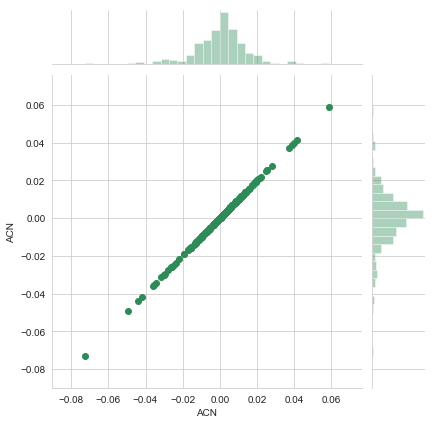

In [92]:
# Compare daily return % for 2 stocks

#Join Plot to plot 2 plots - histograms and whatever else (i.e. scatter)
sns.jointplot('ACN','ACN',tech_rets,kind = 'scatter', color='seagreen')

In [93]:
# Linear relationship bc ACN v. ACN 
# Example of positive linear correlatin

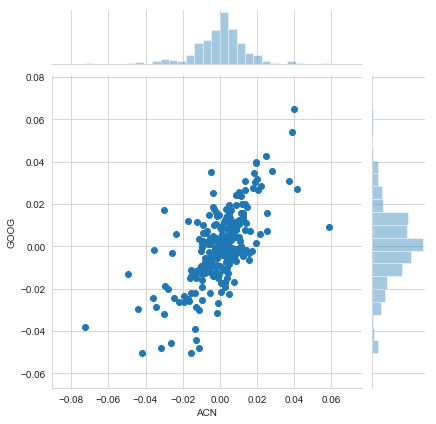

In [99]:
#ACN V. GOOGLE

sns.jointplot('ACN','GOOG',tech_rets,kind = 'scatter')

C:\Users\ronald.a.daley\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


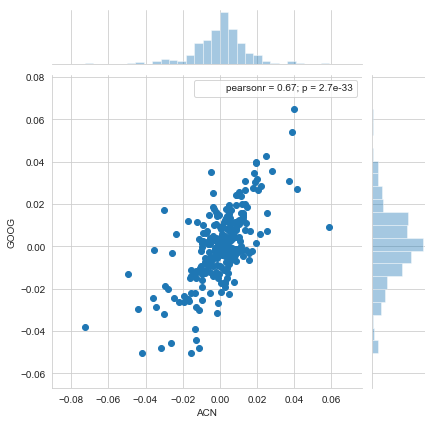

In [101]:
# Additional code to get the pearsonr value to appear

from scipy.stats import stats

sns.jointplot('ACN','GOOG',tech_rets,kind = 'scatter').annotate(stats.pearsonr)


In [102]:
#Intersting, the pearson value (officially known as the Pearson product-moment correlation coefficient) 
# can give you a sense of how correlated the daily percentage returns are.

#You can find more information about it at this link:
#url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

#But for a quick intuitive sense, check out the picture below.

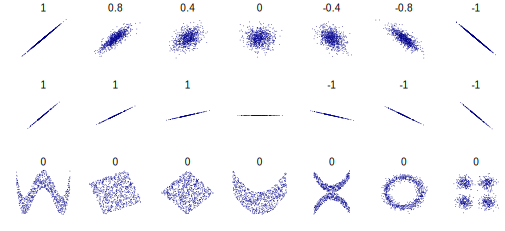

In [103]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [104]:
# value of 1 mean perfectly correlated
# the smaller the number, the less correlated the two Stocks are

In [105]:
# Seaborn and pandas make it very easy to repeat this comparison analysis 
# for every possible combination of stocks in our technology stock ticker list. 
# We can use sns.pairplot() to automatically create this plot

In [106]:
# Use Seaborn and pandas to create a comparison analysis for every stock in portfolio

tech_rets.head()

Symbols,AAPL,ACN,AMZN,GOOG,MSFT
Date,,,,,
2018-02-26,NaN,NaN,NaN,NaN,NaN
2018-02-27,-0.003241,-0.013294,-0.006551,-0.022260,-0.012785
2018-02-28,-0.001514,-0.009474,0.000311,-0.012126,-0.004565
2018-03-01,-0.017516,-0.030184,-0.012562,-0.031872,-0.009811
2018-03-02,0.006914,0.008646,0.004553,0.008789,0.002154


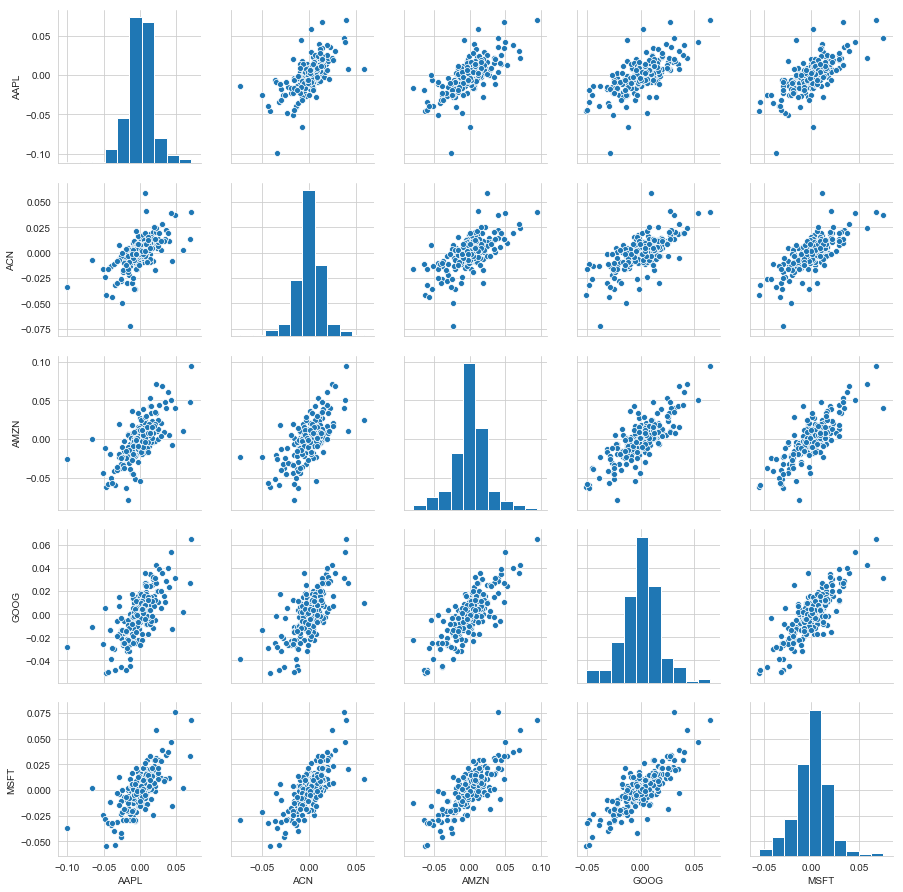

In [107]:
sns.pairplot(tech_rets.dropna())

In [108]:
# On Diagonal is the Histogram of every stock's return
# the upper and lower triangle shows us which stock were correlated and which aren't
# i.e. Correlation between Google and Microsoft daily returns
# meaning stocks have historically behaved identically

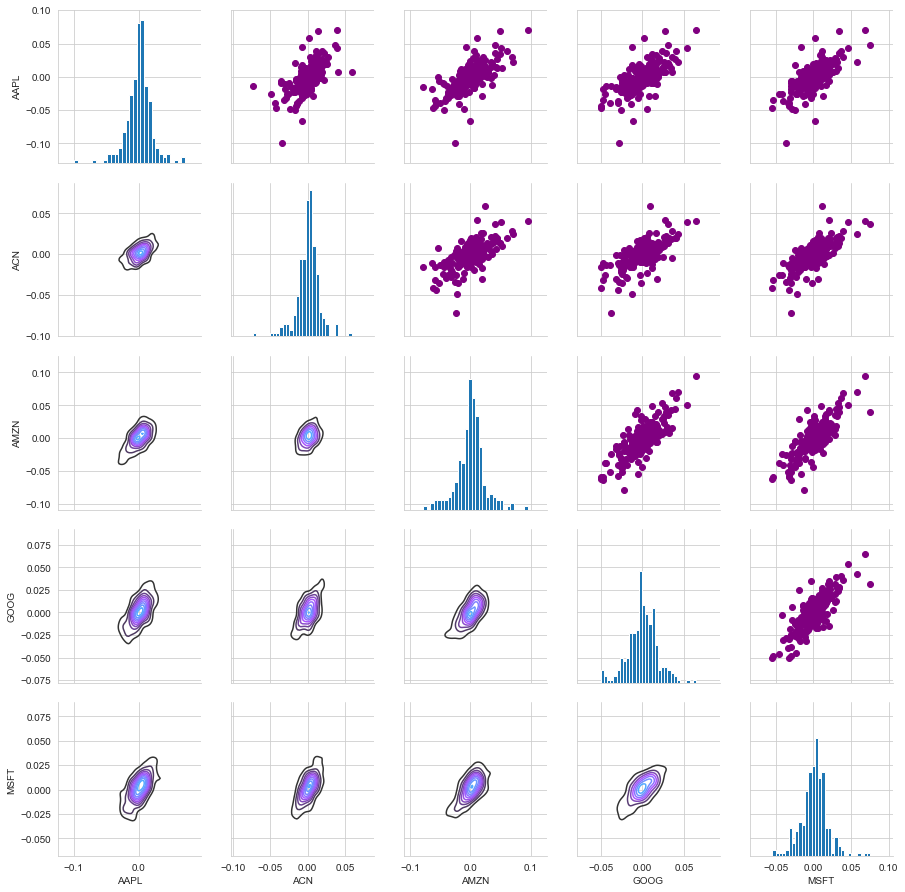

In [113]:
# Control grid using sns.PairGrid()

# Set up our figure by naming it returns_fig,

# call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Grab Figure and pass 3 methods (map_upper, map_lower, and Diagonal)

# Map Upper controls the upper triangle appearance
# Make a scatter plot and color purple
returns_fig.map_upper(plt.scatter,color='purple')

# Lower
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Diagonal
returns_fig.map_diag(plt.hist,bins=30)

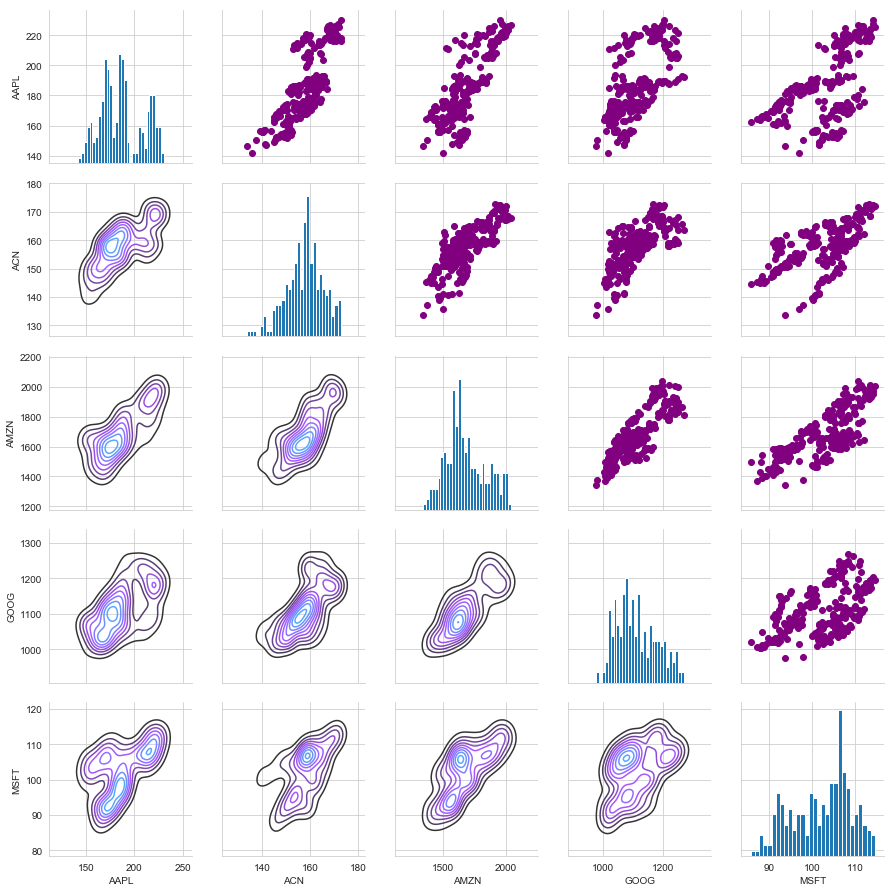

In [114]:
# Analyze correlation of closing price

returns_fig = sns.PairGrid(closing_df)

# Upper
returns_fig.map_upper(plt.scatter,color='purple')

# Lower
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Diagonal
returns_fig.map_diag(plt.hist,bins=30)

In [115]:
# Correlation btw Google and Amazon

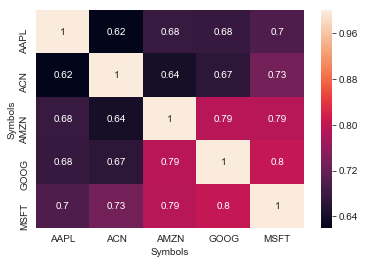

In [121]:
# Corrleation plot of all stocks for daily returns

sns.heatmap(tech_rets.dropna().corr(),annot=True)

In [122]:
# Microsoft and Google have the strongest correlation at 0.8
# Google and Amazon are a close second

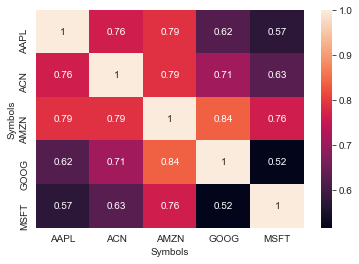

In [123]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

In [124]:
# Google and Amazon have the strongest correlation on closing prices at 0.84 

In [125]:
#All Tech stocks have a strong correlation 

In [126]:
# Risk Analysis - how to quantify risk?
# Risk is defined as the standard deviation of daily returns

# Key Takeaways:
    # Risk - Standard Deviation
    # Expected - Mean

In [127]:
# Analyze and compare risk (standard deviation of daily returns) with Expected returns

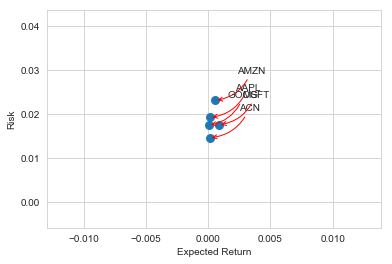

In [148]:
# Create new data frame that drops NA values from % change in daily return
rets = tech_rets.dropna()

# Use area object to define areas of circle plot
area = np.pi*20

# Create scatter plot with x-axis mean of returns and y-axis standard deviation
plt.scatter(rets.mean(),rets.std(),s = area)

# Set the plot axis titles
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 25),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3', color='red'))

In [149]:
# Preferably I want to look for stocks with a low risk and a positive expected return
# don't want a negative return with a high risk (huge standard deviation)
# don't want a high expected return with high risk

In [153]:
# Value at risk using the "bootstrap" method


# For this method we will calculate the empirical quantiles from a histogram of daily returns. 
# For more information on quantiles, 
# check out this link: http://en.wikipedia.org/wiki/Quantile

In [154]:
# Value at risk - the amount of money we could expect to lose (aka putting at risk)
                # for a given confidence interval
    
# 2 Way to calculate Value at risk:
    # Bootstrap Method
    # Monte Carlo Method

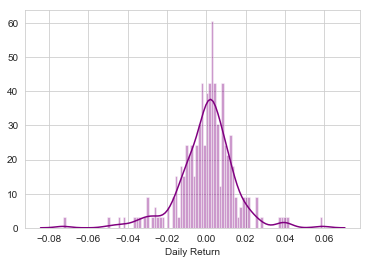

In [158]:
# Daily Returns Histogram for ACN data

sns.distplot(ACN['Daily Return'].dropna(),bins=100,color='purple')

In [159]:
# Use quantile to get the risk value

In [160]:
rets.head()

Symbols,AAPL,ACN,AMZN,GOOG,MSFT
Date,,,,,
2018-02-27,-0.003241,-0.013294,-0.006551,-0.022260,-0.012785
2018-02-28,-0.001514,-0.009474,0.000311,-0.012126,-0.004565
2018-03-01,-0.017516,-0.030184,-0.012562,-0.031872,-0.009811
2018-03-02,0.006914,0.008646,0.004553,0.008789,0.002154
2018-03-05,0.003462,0.008571,0.015571,0.011132,0.006341


In [161]:
rets['ACN'].quantile(0.05)

-0.02593526446797069

In [163]:
# Summary: 

#Quantile 0.05 means:
    # at 95% confidence, 95% of the time, 
    # my worst daily lost will not exceed -0.02593..
    
# With 95% confidence, our worst daily loss will not exceed 2.59%
# If I invest $1M, I will only lose $25K
# My one-day 5% VAR (Value at Risk) is 0.025 * $1M = 25,000

# Translation
# 95% of the time, my worst daily lost will not exceed 2.5% for ACN stock

In [164]:
# Value at Risk via Monte Carlo Method

# Monte Carlo Method - run many trials with random market conditions 
                # then calculate portfolio losses for each trial
                # Afterwards use aggregation of all these simulations to establish how risky the stock it

In [165]:
# For more info on the Monte Carlo method for stocks
# check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

In [172]:
# Start with simulations

#Time Horizon
days = 365

# delta
dt = 1/days

# drift - average return
mu = rets.mean()['GOOG']

# volatility of stock
sigma = rets.std()['GOOG']

In [173]:
# Create a function 
# This function takes in starting stock price
# days of simulation,mu,sigma, and returns simulated price array

def stock_monte_carlo(start_price,days,mu,sigma):
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price #set first term to start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Run price array for number of days
    for x in xrange(1,days):
    
        # Calculate Schock for everyday in the for loop
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
    
        # Calculate Drift
        drift[x] = mu * dt
        
        # Calculate Price
        price[x] = price[x-1] + (price[x-1])*(drift[x]+shock[x])
        
    return price

In [174]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-26,1143.959961,1126.694946,1127.800049,1143.750000,1559100,1143.750000
2018-02-27,1144.040039,1118.000000,1141.239990,1118.290039,1774100,1118.290039
2018-02-28,1127.530029,1103.239990,1123.030029,1104.729980,1882600,1104.729980
2018-03-01,1110.119995,1067.000977,1107.869995,1069.520020,2515900,1069.520020
2018-03-02,1081.999023,1048.114990,1053.079956,1078.920044,2271600,1078.920044


Text(0.5,1,'Monte Carlo Analysis for Google')

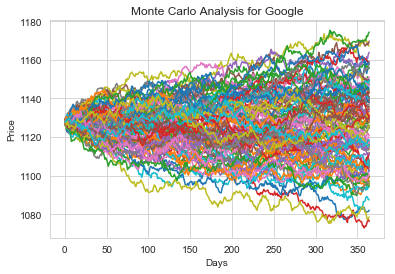

In [176]:
# Get start price (open) from GOOG.head()
start_price = 1127.800049

# Run the monte carlo function 100 times and plot
for run in xrange(100):
    # Already defined days, mu, and sigma inputs
    
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [177]:
#Simulated a years worth of 100 random trials using google stock
#Now create hsitogram of results

In [179]:
#Increase the no. of runs to 10000
runs = 10000

# Create an empty matrix to hold the end price data
simulation = np.zeros(runs)

for run in xrange(runs):
    # Set the simulation data point as the last stock price for that run
    simulation[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
#Translation: for every run, each point in simulation will be an input into the stock_monte_carlo function

#Grabbing an array of all 10,0000 final price points for each simulation

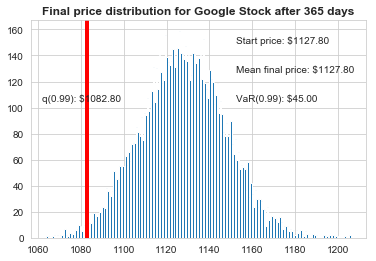

In [181]:
#Use Quantile to define risk for the stock

# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between the output
q = np.percentile(simulation,1)

# plot histogram
plt.hist(simulation,bins=200)

# fill in additional info into plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [182]:
# Histogram of all the final prices
# Starting price is $1127.80
# Average final price is $1127.80 
# which means this is a stable stock

# Risk
# Red line is plotted at 1% quantile result ($1082.80)
# The VAR for each google stock is $45

#Monte Carlo Simulation Translation:
# 99% of the time, I run the simulation, the amount of money I would lose at most is $45
# Pretty low risk for the initial investment of $1127.60

In [ ]:
#Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

#1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

#2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

#3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.